In [1]:
import numpy as np
import pandas as pd
import skfuzzy as fuzz
from skfuzzy import control as ctrl
import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import pandas as pd
import os

file_path = './data/data.csv' # Pastikan path ini benar

try:
    # Cek apakah file ada
    if not os.path.exists(file_path):
        print(f"Error: File '{file_path}' not found.")
    else:
        # Baca file CSV ke dalam DataFrame
        df = pd.read_csv(file_path)
        print(f"Successfully loaded '{file_path}' into a DataFrame.")
        print("First 5 rows of the data:")
        print(df.head())
        
except Exception as e:
    print(f"An error occurred while reading the CSV file: {e}")

Successfully loaded './data/data.csv' into a DataFrame.
First 5 rows of the data:
                                   title   type                     genres  \
0                      The Fifth Element  movie  Action, Adventure, Sci-Fi   
1                      Kill Bill: Vol. 1  movie    Action, Crime, Thriller   
2                                Jarhead  movie      Biography, Drama, War   
3                             Unforgiven  movie             Drama, Western   
4  Eternal Sunshine of the Spotless Mind  movie     Drama, Romance, Sci-Fi   

   releaseYear     imdbId  imdbAverageRating  imdbNumVotes  \
0       1997.0  tt0119116                7.6      520429.0   
1       2003.0  tt0266697                8.2     1231926.0   
2       2005.0  tt0418763                7.0      213186.0   
3       1992.0  tt0105695                8.2      447623.0   
4       2004.0  tt0338013                8.3     1117767.0   

                                  availableCountries  
0                    

In [3]:
# Load the dataset
df = pd.read_csv('./data/data.csv')

# Drop rows with missing values
df_cleaned = df.dropna()

# Drop the 'imdbId' column as it is not needed
df_cleaned = df_cleaned.drop(columns=['imdbId'])

# Save the cleaned data
df_cleaned.to_csv('./data/data-cleaned.csv', index=False)

print('Dataset cleaned and saved to ./data/data-cleaned.csv')

Dataset cleaned and saved to ./data/data-cleaned.csv


In [4]:
# Load the cleaned dataset
data = pd.read_csv('./data/data-cleaned.csv')

# Display first 30% of the dataset
percentage = 0.3
data[:int(len(data) * percentage)]

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,520429.0,"AT, CH, DE"
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1231926.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ..."
2,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,213186.0,"AD, AE, AG, AO, BH, BM, BS, BZ, CI, CM, CO, CR..."
3,Unforgiven,movie,"Drama, Western",1992.0,8.2,447623.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO..."
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,1117767.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG..."
...,...,...,...,...,...,...,...
5677,Two for the Girl,movie,"Action, Adventure",2009.0,6.3,203.0,"AG, AR, BB, BM, BO, BS, BZ, CL, CO, CR, CU, DO..."
5678,Alone Man,movie,"Drama, Romance, Sci-Fi",2016.0,6.3,149.0,BR
5679,Rumble,movie,Action,2016.0,3.7,320.0,JP
5680,Mission Blue,movie,"Documentary, Drama",2014.0,7.9,2184.0,"AD, AE, AG, AL, AO, AR, AT, AU, AZ, BA, BB, BE..."


In [5]:
# Determine the data ranges
min_year = data['releaseYear'].min()
max_year = data['releaseYear'].max()
max_votes = data['imdbNumVotes'].max()

print(f"Release Year Range: {min_year} - {max_year}")
print(f"Number of Votes Range: 0 - {max_votes}")

# Define the universal variables
imdb_rating = ctrl.Antecedent(np.arange(0, 10.1, 0.1), 'imdb_rating')
release_year = ctrl.Antecedent(np.arange(min_year, max_year + 1, 1), 'release_year')
num_votes = ctrl.Antecedent(np.arange(0, max_votes + 1, 10000), 'num_votes')
movie_quality = ctrl.Consequent(np.arange(0, 11, 1), 'movie_quality')

Release Year Range: 1913.0 - 2025.0
Number of Votes Range: 0 - 2991005.0


In [6]:
# IMDb Rating Membership Functions
imdb_rating['low'] = fuzz.trapmf(imdb_rating.universe, [0, 0, 3, 5])
imdb_rating['medium'] = fuzz.trimf(imdb_rating.universe, [4, 5.5, 7])
imdb_rating['high'] = fuzz.trapmf(imdb_rating.universe, [6, 8, 10, 10])

# Release Year Membership Functions
release_year['classic'] = fuzz.trapmf(release_year.universe, [min_year, min_year, 1970, 1990])
release_year['modern'] = fuzz.trimf(release_year.universe, [1985, 2000, 2010])
release_year['contemporary'] = fuzz.trapmf(release_year.universe, [2000, 2020, max_year, max_year])

# Number of Votes Membership Functions
num_votes['few'] = fuzz.trapmf(num_votes.universe, [0, 0, 50000, 150000])
num_votes['average'] = fuzz.trimf(num_votes.universe, [100000, 200000, 400000])
num_votes['many'] = fuzz.trapmf(num_votes.universe, [300000, 500000, max_votes, max_votes])

# Movie Quality Membership Functions
movie_quality['low'] = fuzz.trapmf(movie_quality.universe, [0, 0, 3, 5])
movie_quality['medium'] = fuzz.trimf(movie_quality.universe, [4, 5.5, 7])
movie_quality['high'] = fuzz.trapmf(movie_quality.universe, [6, 8, 10, 10])

C:\Users\User\miniconda3\Lib\site-packages\skfuzzy\control\fuzzyvariable.py:125: UserWarning: FigureCanvasAgg is non-interactive, and thus cannot be shown
  fig.show()


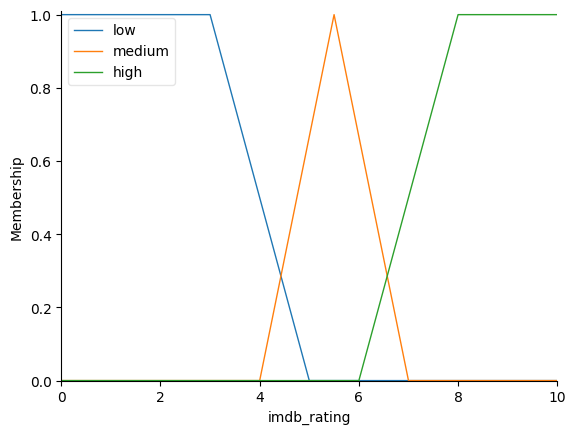

In [7]:
# Visualize IMDb Rating Membership Functions
imdb_rating.view()
plt.show()

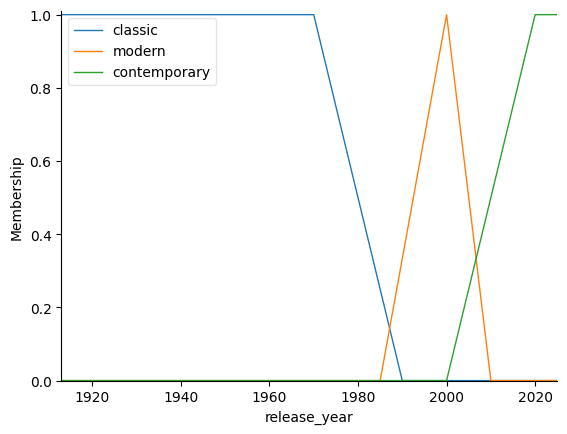

In [8]:
# Visualize Release Year Membership Functions
release_year.view()
plt.show()

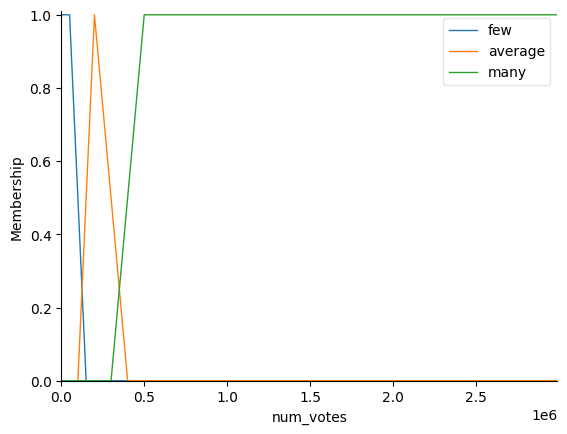

In [9]:
# Visualize Number of Votes Membership Functions
num_votes.view()
plt.show()

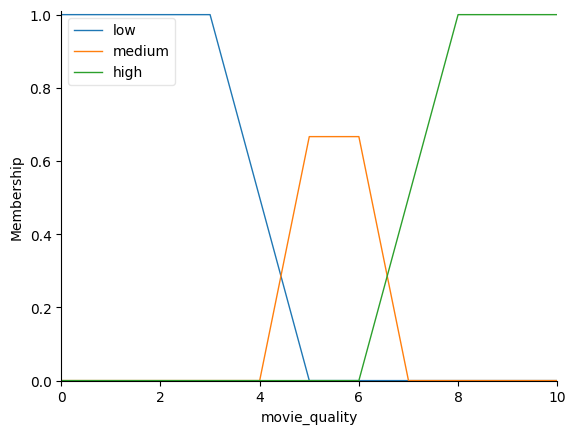

In [10]:
# Visualize Movie Quality Membership Functions
movie_quality.view()
plt.show()

In [20]:
# Rule definitions
rule1 = ctrl.Rule(imdb_rating['high'] & num_votes['many'], movie_quality['high'])
rule2 = ctrl.Rule(imdb_rating['medium'] & num_votes['average'], movie_quality['medium'])
rule3 = ctrl.Rule(imdb_rating['low'] & num_votes['few'], movie_quality['low'])
rule4 = ctrl.Rule(imdb_rating['high'] & release_year['classic'], movie_quality['high'])
rule5 = ctrl.Rule(imdb_rating['medium'] & release_year['modern'], movie_quality['medium'])
rule6 = ctrl.Rule(imdb_rating['low'] | num_votes['few'], movie_quality['low'])
rule7 = ctrl.Rule(imdb_rating['high'], movie_quality['high'])
rule8 = ctrl.Rule(imdb_rating['medium'], movie_quality['medium'])
rule9 = ctrl.Rule(imdb_rating['low'], movie_quality['low'])

In [21]:
# Build the control system with all the rules
movie_quality_ctrl = ctrl.ControlSystem([
    rule1, rule2, rule3, rule4, rule5, rule6, rule7, rule8, rule9
])

# Note: We will create new simulation instances for each computation to avoid state issues.

In [22]:
# Function to compute movie quality
def compute_movie_quality(row):
    # Create a new simulation instance for each row
    movie_quality_simulation = ctrl.ControlSystemSimulation(movie_quality_ctrl)

    # Initialize variables
    imdb_rating_value = None
    release_year_value = None
    num_votes_value = None

    try:
        # Set input values
        imdb_rating_value = row['imdbAverageRating']
        release_year_value = row['releaseYear']
        num_votes_value = row['imdbNumVotes']

        # Clip inputs to universes
        imdb_rating_value = np.clip(imdb_rating_value, imdb_rating.universe[0], imdb_rating.universe[-1])
        release_year_value = np.clip(release_year_value, release_year.universe[0], release_year.universe[-1])
        num_votes_value = np.clip(num_votes_value, num_votes.universe[0], num_votes.universe[-1])

        # Set inputs
        movie_quality_simulation.input['imdb_rating'] = imdb_rating_value
        movie_quality_simulation.input['release_year'] = release_year_value
        movie_quality_simulation.input['num_votes'] = num_votes_value

        # Compute the fuzzy result
        movie_quality_simulation.compute()

        return movie_quality_simulation.output['movie_quality']

    except Exception as ex:
        print(f"Error computing for row {row.name}: {ex}")
        print(f"Inputs: imdb_rating={imdb_rating_value}, release_year={release_year_value}, num_votes={num_votes_value}")
        return np.nan

# Apply the fuzzy logic model to the dataset
data['movie_quality_score'] = data.apply(compute_movie_quality, axis=1)

In [23]:
# Display the updated dataset with the new column
data.head()

,title,type,genres,releaseYear,imdbAverageRating,imdbNumVotes,availableCountries,movie_quality_score,movie_quality_category
0,The Fifth Element,movie,"Action, Adventure, Sci-Fi",1997.0,7.6,520429.0,"AT, CH, DE",8.366667,High
1,Kill Bill: Vol. 1,movie,"Action, Crime, Thriller",2003.0,8.2,1231926.0,"AE, AL, AO, AT, AU, AZ, BG, BH, BY, CI, CM, CZ...",8.444444,High
2,Jarhead,movie,"Biography, Drama, War",2005.0,7.0,213186.0,"AD, AE, AG, AO, BH, BM, BS, BZ, CI, CM, CO, CR...",8.238095,High
3,Unforgiven,movie,"Drama, Western",1992.0,8.2,447623.0,"AU, BA, BG, CZ, HR, HU, MD, ME, MK, NZ, PL, RO...",8.444444,High
4,Eternal Sunshine of the Spotless Mind,movie,"Drama, Romance, Sci-Fi",2004.0,8.3,1117767.0,"AD, AE, AG, AL, AO, AR, AU, AZ, BA, BB, BE, BG...",8.444444,High


In [24]:
# Define a function to classify the movies
def classify_movie(score):
    if score >= 6.0:
        return 'High'
    elif score >= 4.0:
        return 'Medium'
    else:
        return 'Low'

# Apply the classification
data['movie_quality_category'] = data['movie_quality_score'].apply(classify_movie)

In [25]:
# Display the top 10 movies with the highest quality scores
top_movies = data.sort_values(by='movie_quality_score', ascending=False)
# save the top movies to a csv file
top_movies.to_csv('./data/top-movies.csv', index=False)


top_movies[['title', 'imdbAverageRating', 'releaseYear', 'imdbNumVotes', 'movie_quality_score', 'movie_quality_category']].head(10)

,title,imdbAverageRating,releaseYear,imdbNumVotes,movie_quality_score,movie_quality_category
170,Goodfellas,8.7,1990.0,1302946.0,8.444444,High
199,Dr. Strangelove or: How I Learned to Stop Worr...,8.3,1964.0,532570.0,8.444444,High
5813,PK,8.1,2014.0,207597.0,8.444444,High
14709,How I Met Your Mother,8.3,2005.0,750298.0,8.444444,High
185,In the Mood for Love,8.1,2000.0,173165.0,8.444444,High
15477,Lucifer,8.0,2016.0,369706.0,8.444444,High
189,Saving Private Ryan,8.6,1998.0,1545932.0,8.444444,High
14710,Mad Men,8.7,2007.0,270226.0,8.444444,High
15398,Sense8,8.2,2015.0,166305.0,8.444444,High
18633,The Gentlemen,8.0,2024.0,151968.0,8.444444,High


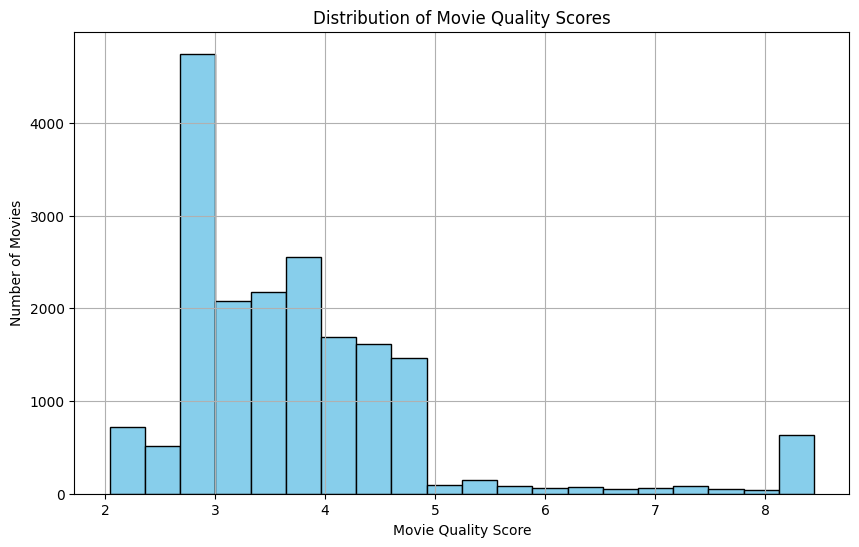

In [26]:
# Plot the distribution of movie quality scores
plt.figure(figsize=(10,6))
plt.hist(data['movie_quality_score'].dropna(), bins=20, color='skyblue', edgecolor='black')
plt.title('Distribution of Movie Quality Scores')
plt.xlabel('Movie Quality Score')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()

Movie Quality Category Counts:
movie_quality_category
Low       12809
Medium     5094
High       1040
Name: count, dtype: int64


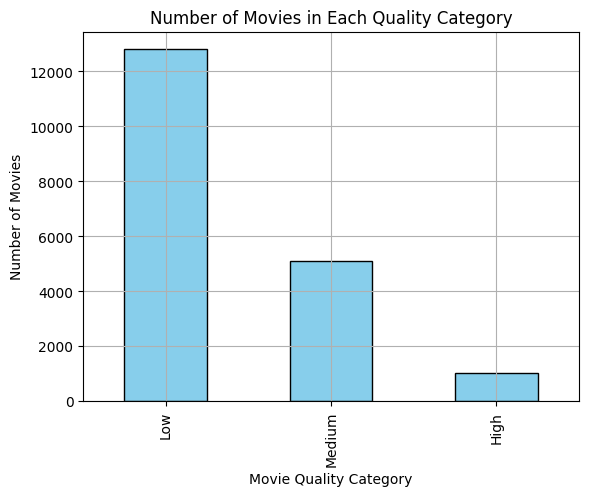

In [27]:
# Count the number of movies in each category
category_counts = data['movie_quality_category'].value_counts()
print("Movie Quality Category Counts:")
print(category_counts)

# Plot the counts
category_counts.plot(kind='bar', color='skyblue', edgecolor='black')
plt.title('Number of Movies in Each Quality Category')
plt.xlabel('Movie Quality Category')
plt.ylabel('Number of Movies')
plt.grid(True)
plt.show()